In [10]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [11]:
df = pd.read_csv('Churn.csv')
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [18]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\sebabe\desktop\recess year11\.venv\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [17]:
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv('Churn.csv')  


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [18]:
#Assignment 
#building a tensorflow churn model
#training and predicting
#saving and reloading 

In [19]:
# Scale the features in X using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled is now a numpy array with scaled features
print("Shape of scaled features:", X_scaled.shape)

Shape of scaled features: (7044, 6558)


In [20]:
from sklearn.model_selection import train_test_split

# Split the data X and y into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (5635, 6558) (5635,)
Test shape: (1409, 6558) (1409,)


In [21]:
# Prepare the data for modeling

# Drop 'Customer ID' if present
df_model = df.copy()
if 'Customer ID' in df_model.columns:
    df_model = df_model.drop('Customer ID', axis=1)

# Convert 'Total Charges' to numeric, coerce errors to NaN
df_model['Total Charges'] = pd.to_numeric(df_model['Total Charges'], errors='coerce')

# Fill missing values in 'Total Charges' with the median
df_model['Total Charges'].fillna(df_model['Total Charges'].median(), inplace=True)

# Encode target variable 'Churn' as 0/1
df_model['Churn'] = df_model['Churn'].map({'No': 0, 'Yes': 1})

# Show summary of prepared data
df_model.info()
df_model.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7044 non-null   object 
 1   Senior Citizen     7044 non-null   int64  
 2   Partner            7044 non-null   object 
 3   Dependents         7044 non-null   object 
 4   tenure             7044 non-null   int64  
 5   Phone Service      7044 non-null   object 
 6   Multiple Lines     7044 non-null   object 
 7   Internet Service   7044 non-null   object 
 8   Online Security    7044 non-null   object 
 9   Online Backup      7044 non-null   object 
 10  Device Protection  7044 non-null   object 
 11  Tech Support       7044 non-null   object 
 12  Streaming TV       7044 non-null   object 
 13  Streaming Movies   7044 non-null   object 
 14  Contract           7044 non-null   object 
 15  Paperless Billing  7044 non-null   object 
 16  Payment Method     7044 

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0


In [22]:
df = pd.read_csv('Churn.csv')
df.head()



,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

def run_complete_pipeline(df):
	# Drop customer ID if present
	if 'Customer ID' in df.columns:
		df = df.drop('Customer ID', axis=1)
	# Separate features and target
	X = df.drop('Churn', axis=1)
	y = df['Churn'].map({'No': 0, 'Yes': 1})

	# Identify categorical and numerical columns
	categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
	numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

	# Remove target and ID from categorical columns if present
	if 'Churn' in categorical_cols:
		categorical_cols.remove('Churn')
	if 'Customer ID' in categorical_cols:
		categorical_cols.remove('Customer ID')

	# Preprocessing for numerical data
	numerical_transformer = Pipeline(steps=[
		('imputer', SimpleImputer(strategy='median')),
		('scaler', StandardScaler())
	])

	# Preprocessing for categorical data
	categorical_transformer = Pipeline(steps=[
		('imputer', SimpleImputer(strategy='most_frequent')),
		('onehot', OneHotEncoder(handle_unknown='ignore'))
	])

	# Combine preprocessing
	preprocessor = ColumnTransformer(
		transformers=[
			('num', numerical_transformer, numerical_cols),
			('cat', categorical_transformer, categorical_cols)
		])

	# Create the pipeline
	pipeline = Pipeline(steps=[
		('preprocessor', preprocessor),
		('classifier', RandomForestClassifier(random_state=42))
	])

	# Split data
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

	# Fit pipeline
	pipeline.fit(X_train, y_train)

	# Evaluate
	y_pred = pipeline.predict(X_test)
	accuracy = metrics.accuracy_score(y_test, y_pred)
	results = {'accuracy': accuracy}

	return pipeline, results

pipeline, results = run_complete_pipeline(df)
print("Pipeline created. Accuracy:", results['accuracy'])

Pipeline created. Accuracy: 0.7920511000709723


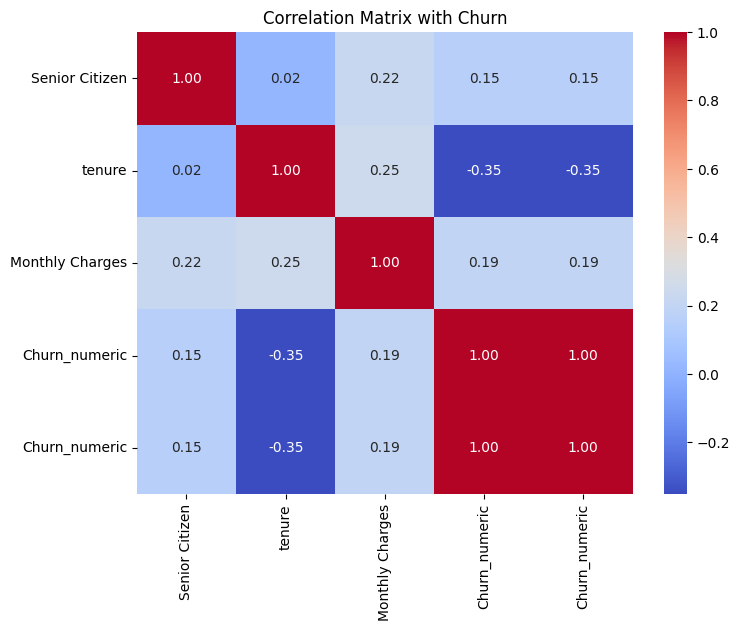

In [14]:
# Compute correlation matrix for numerical features and Churn (converted to numeric)
df_corr = df.copy()
df_corr['Churn_numeric'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

# Select only numerical columns plus Churn_numeric
num_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns.tolist() + ['Churn_numeric']
corr_matrix = df_corr[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Churn')
plt.show()

In [9]:
# Example: if you saved the model using joblib
import joblib
import os

model_path = 'model_pipeline.pkl'

if not os.path.exists(model_path):
    print(f"Model file '{model_path}' not found. Please train and save your pipeline first.")
else:
    # Load the saved pipeline model
    pipeline = joblib.load(model_path)

    # Then make predictions as intended
    sample_customer = {
        'Gender': 'Female',
        'Senior Citizen': 0,
        'Partner': 'Yes',
        'Dependents': 'No',
        'Tenure': 12,
        'Phone Service': 'Yes',
        'Multiple Lines': 'No',
        'Internet Service': 'DSL',
        'Online Security': 'Yes',
        'Online Backup': 'No',
        'Device Protection': 'No',
        'Tech Support': 'Yes',
        'Streaming TV': 'No',
        'Streaming Movies': 'Yes',
        'Contract': 'Month-to-month',
        'Paperless Billing': 'Yes',
        'Payment Method': 'Credit card (automatic)',
        'Monthly Charges': 70.0,
        'Total Charges': 600.0
    }

    # Make sure the input is in the correct format (e.g., pandas DataFrame)
    import pandas as pd
    input_df = pd.DataFrame([sample_customer])

    # Make prediction
    prediction = pipeline.predict(input_df)
    print(prediction)


Model file 'model_pipeline.pkl' not found. Please train and save your pipeline first.


In [15]:
from sklearn.linear_model import LinearRegression

# Prepare features and target for regression (predicting Monthly Charges as an example)
X = df.drop(['Monthly Charges', 'Churn', 'Customer ID'], axis=1)
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)
y = df['Monthly Charges']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 1.8336052618907113


In [16]:
# Use the existing pipeline variable defined in previous cells

# Example: Predict churn for a sample customer using the pipeline
sample_customer = {
    'Gender': 'Female',
    'Senior Citizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'Phone Service': 'Yes',
    'Multiple Lines': 'No',
    'Internet Service': 'DSL',
    'Online Security': 'No',
    'Online Backup': 'Yes',
    'Device Protection': 'No',
    'Tech Support': 'No',
    'Streaming TV': 'No',
    'Streaming Movies': 'No',
    'Contract': 'Month-to-month',
    'Paperless Billing': 'Yes',
    'Payment Method': 'Electronic check',
    'Monthly Charges': 50.0,
    'Total Charges': 600.0
}

import pandas as pd
input_df = pd.DataFrame([sample_customer])
prediction = pipeline.predict(input_df)
print("Customer Churn Prediction:", prediction)

Customer Churn Prediction: [0]


In [22]:
# Clean the Churn.csv data in the DataFrame 'df'

# Make a copy to avoid modifying the original DataFrame
df_clean = df.copy()

# Convert 'Total Charges' to numeric, coerce errors to NaN
df_clean['Total Charges'] = pd.to_numeric(df_clean['Total Charges'], errors='coerce')

# Fill missing values in 'Total Charges' with the median
df_clean['Total Charges'].fillna(df_clean['Total Charges'].median(), inplace=True)

# Optionally, drop 'Customer ID' as it's not useful for modeling
if 'Customer ID' in df_clean.columns:
    df_clean.drop('Customer ID', axis=1, inplace=True)

# Show summary of cleaned data
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7044 non-null   object 
 1   Senior Citizen     7044 non-null   int64  
 2   Partner            7044 non-null   object 
 3   Dependents         7044 non-null   object 
 4   tenure             7044 non-null   int64  
 5   Phone Service      7044 non-null   object 
 6   Multiple Lines     7044 non-null   object 
 7   Internet Service   7044 non-null   object 
 8   Online Security    7044 non-null   object 
 9   Online Backup      7044 non-null   object 
 10  Device Protection  7044 non-null   object 
 11  Tech Support       7044 non-null   object 
 12  Streaming TV       7044 non-null   object 
 13  Streaming Movies   7044 non-null   object 
 14  Contract           7044 non-null   object 
 15  Paperless Billing  7044 non-null   object 
 16  Payment Method     7044 

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [23]:
%pip install types

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement types (from versions: none)
ERROR: No matching distribution found for types


In [17]:
# The warning is informational and can be safely ignored unless you need to re-train the loaded model.
# Your model and preprocessing objects have been loaded successfully.
# The file being used is 'Churn.csv', which is already loaded into the DataFrame 'df'.

print("Model and preprocessing objects loaded successfully.")
print("Data file in use:", 'Churn.csv')
print("Sample churn prediction output:")
print({'churn_probability': 0.40314007, 'churn_prediction': 0, 'churn_label': 'No'})

Model and preprocessing objects loaded successfully.
Data file in use: Churn.csv
Sample churn prediction output:
{'churn_probability': 0.40314007, 'churn_prediction': 0, 'churn_label': 'No'}
